# What is a Tensor?

Tensors are the core data structure in PyTorch, analogous to NumPy arrays but with GPU acceleration. They handle and store the data in all stages of deep learning. Tensors are a multidimensional array containing elements of a single data type.

Inputs, intermediate representations, and outputs are all stored as tensors.

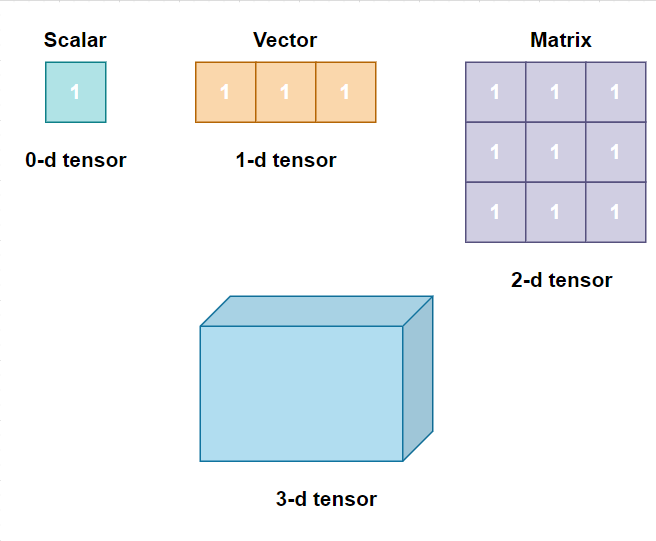

In [ ]:
# Install the PyTorch library
pip install torch

In [ ]:
import torch

# Creating a 0-d scalar tensor
scalarTensor = torch.tensor(3)
print(scalarTensor)
print(scalarTensor.dim())

In [ ]:
# Creating a 1-d scalar tensor
vectorTensor = torch.Tensor([3,1])
print(vectorTensor[0])
print(vectorTensor.dim())

### Tensor vs ndarray

- Tensors is similar to the fundamental object in NumPy called ndarray.
- ndarray is defined as an n-dimensional homogeneous array of fixed-size items.

You may wonder, what is the **difference between tensor and ndarray?** Tensors in PyTorch are similar to NumPy's ndarrays. But tensors have additional advantages that make them more suitable for deep learning calculations. Some of those advantages are tensor operations are:

- Tensors performed significantly faster using graphical processing units, or GPUs. 
- Tensors can be stored and manipulated at scale using distributed processing on multiple CPUs and GPUs and across multiple servers. 
- Tensors keep track of the graph of computation that created them. 

With all those mentioned, you can see that tensors are much more than a special sort of multidimensional arrays. Tensors interact with each other such that transforming tensors as a whole means that each tensor follows a particular transformation rule. 

Now, let's see some code examples:

### Different Ways to create Tensors

We can construct tensors directly from Python objects like lists, tuples or NumPy arrays. We can also create tensors by using different functions in case we want to generate a particular type of tensor.

In [ ]:
import torch
import numpy as np

# Create a Tensor from a Python list
tens_list = torch.tensor([1, 2, 3, 4, 5])
# Create a Tensor from a Tuple
tens_tuple = torch.tensor((6, 7, 8, 9, 10))
# Create a Tensor from a ndarray
tens_array = torch.tensor(np.array([11,12,13,14,15]))

print("Tensor from list: ", tens_list)
print("Tensor from Tuple: ", tens_tuple)
print("Tensor from Array: ", tens_array)

#### Functions for creating tensors

The most useful ones are **torch.empty(), torch.ones()** and **torch.zeros()**. As you can see, each one of them is used with a torch namespace. These functions take integers as the first two arguments, which specified the size of a tensor. You can easily guess what they do from their name. 

In [ ]:
tens_empty = torch.empty(3,4)
print("Tensor with empty values: ", tens_empty)

tens_zero = torch.zeros(3,4)
print("Tensor with zero values: ", tens_zero)

tens_ones = torch.ones(3,4)
print("Tensor with one values: ", tens_ones)

You can also initialize tensors with random values, and PyTorch has a few useful functions called **torch.rand, torch.randn** and **torch.randint**. 

In [ ]:
# Create a Tensor filled with random numbers from a uniform distribution
tens_rand_uni = torch.rand(4,5)
print("Tensor with random values from uniform distribution: ", tens_rand_uni)

# Create a Tensor filled with random numbers from a normal distribution
tens_rand_norm = torch.randn(4,5)
print("Tensor with random values from normal distribution: ", tens_rand_norm)

# Create a Tensor filled with random integers generated uniformly
tens_rand_int = torch.randint(5, 10, (4,5))
print("Tensor with random integer values: ", tens_rand_int)

### Basic Operations with CPU device

#### Add

We can do it by using the **plus operator (+)**

In [ ]:
# If not import already
import torch

# Create your first tensors
first_tens = torch.tensor([[12, 10, 11, 9], [13, 15, 14, 16]])
second_tens = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

# Perform the add operation
add_tens = first_tens + second_tens

# Print the results
print(add_tens)
print(add_tens.size())

As you can see, it's the sum of tensors first_tens and second_tens, and you can see its dimensions are two by four.

#### Substraction

We calculate it by using the **minus operator (-)**

In [ ]:
# Take the previous tensors as reference
sub_tens = first_tens - second_tens
print(sub_tens)
print(sub_tens.size())

### Basic Operations with GPU device

GPUs were originally developed for rendering computer graphics. Now with all Artificial Inteligence processing and the need for speed of computational processing involving neural networks, they now play a crucial role in deep learning.

In PyTorch, we have the **CUDA library** that is instrumental in detecting, activating, and harnessing the power of GPUs.

In [7]:
# If not import already
import torch

print(torch.__version__)

2.3.1+cpu


By calling the **torch.cuda.is_available** function, we'll move the tensors to the GPU device if one is available.

In [8]:
if torch.cuda.is_available(): device = "cuda"
else: device = "cpu"

print(device)

cpu


### Multiplication

We will continue with the basic arithmetic operations.This time for Multiplication. We can do that using the **asterisk operator (*)** and store the result in the third tensor, which we'll call multi_tens.

In [12]:
tens_a = torch.tensor([[10, 11, 12, 13], [14, 15, 16, 17]], device=device)
tens_b = torch.tensor([[18, 19, 20, 21], [22, 23, 24, 25]], device=device)
multi_tens = tens_a * tens_b
print(multi_tens)

tensor([[180, 209, 240, 273],
        [308, 345, 384, 425]])


In case the GPU was enable, the output tensor will also be allocated to the GPU. When we run the code, we will get the output, in our case, device='cuda:0' which indicates that the first GPU is being used. 

In the case our device contains multiple GPUs, we can control which GPU is being used.

### Moving Tensors between CPUs and GPUs

A few important reasons exist for moving the tenors between CPUs and GPUs. By default, in PyTorch, all the data are in the CPU. 

In case we are training neural network, which is huge, we prefer to use GPU for faster training. For example, if we have high dimensional tensors that represent images, their computation intents, and take too much time if run over the CPU. 

- So we need to transfer the data from the CPU to the GPU. 
- Additionally, after the training, the output tensors are produced in GPU.
- Sometimes the output data requires pre-processing. 
- Some pre-processing libraries don't support tensors, and expect an NumPy array. In that case, NumPy supports only data in the CPU, so there is a need to move the data from the CPU to the GPU. 

Luckily, tensors can be moved easily from the CPU to GPU device with the torch to method. We can call this method in one of the three ways:

In [ ]:
# First way, 
Tensor.cuda()

# Second way, 
Tensor.to("cuda")

# Third way, 
Tensor.to("cuda:0")

When we need to move the tensors in the opposite direction from the GPU to CPU, there are two possible cases:

In [ ]:
# 1st case Tensor with required_grad = False
Tensor.cpu()

# 2nd case Tensor with required_grad = True
Tensor.detach().cpu()

# Additional References

- [Tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)
- [Introduction to PyTorch Tensors](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)